In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt
from sklearn.metrics import mean_squared_error 
import warnings
warnings.filterwarnings("ignore")

In [13]:
#gdp = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\gdp-per-capita-ppp-constant-2011.csv")
#gdp = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\FMAC-HPI_24420.csv")
#gdp = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\AirPassengers.csv")
shamp = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\sales-of-shampoo-over-a-three-ye.csv",index_col=0)

In [14]:
#y_gdp = gdp['GDP_per_capita']
#y_gdp = gdp['Passengers']
y_gdp = shamp['Sales of shampoo over a three year period']

In [15]:
y_trn_gdp = y_gdp.iloc[:-4]
y_tst_gdp = y_gdp.iloc[-4:]

In [16]:
alpha = 0.15
beta = 0.8


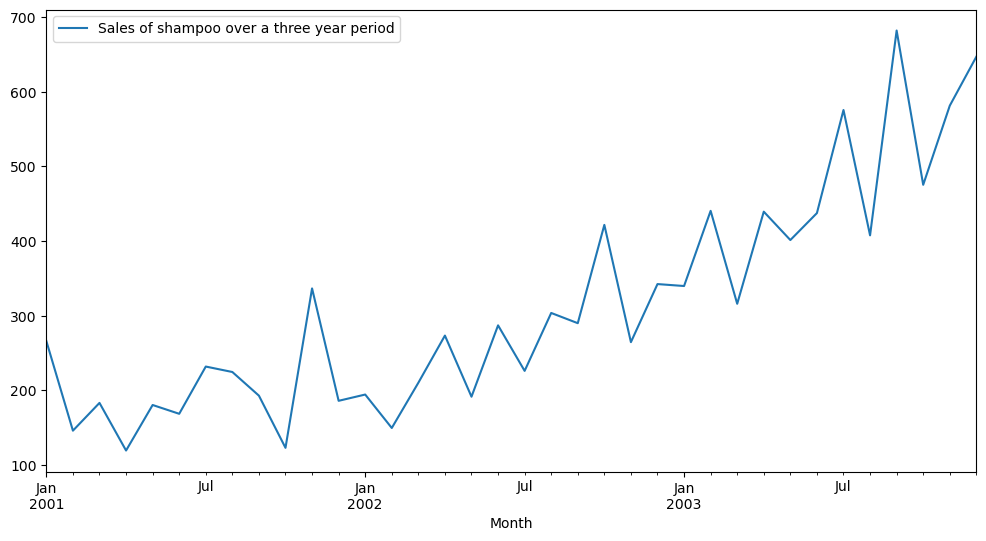

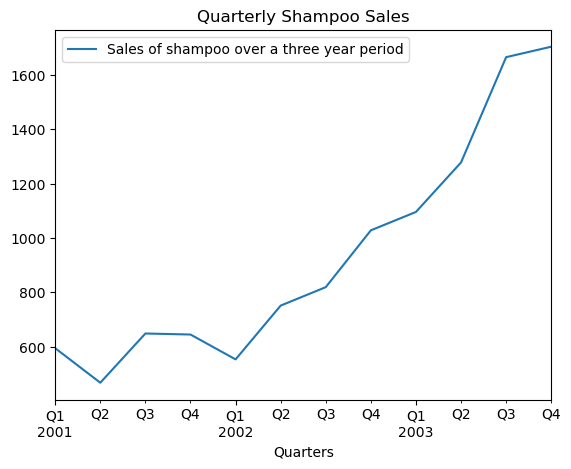

C:\Users\dai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


RMSE =  99.22066726960934


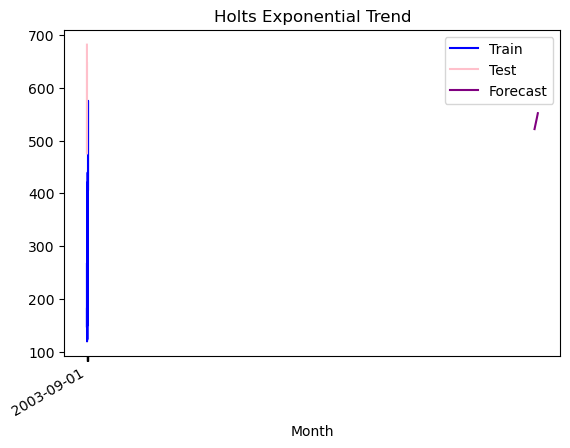

In [17]:
shamp.index =pd.to_datetime(shamp.index).to_period("M")
shamp.plot(figsize=(12,6))
plt.show()
shamp_qtr = shamp.resample("Q").sum()
shamp_qtr.index.rename("Quarter",inplace = True)
shamp_qtr.plot()
plt.title("Quarterly Shampoo Sales")
plt.xlabel("Quarters")
plt.show()

y = shamp_qtr['Sales of shampoo over a three year period']
y_train = y[:-3]
y_test = y[-3:]
#aplha= 0.4
from  statsmodels.tsa.api import Holt
alpha = 0.4
beta = 1.0
holt = Holt(y_trn_gdp,exponential = True)
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_tst_gdp))
y_trn_gdp.plot(color='blue',label = 'Train')
y_tst_gdp.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
plt.title("Holts Exponential Trend")
plt.legend(loc="best")
print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

C:\Users\dai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


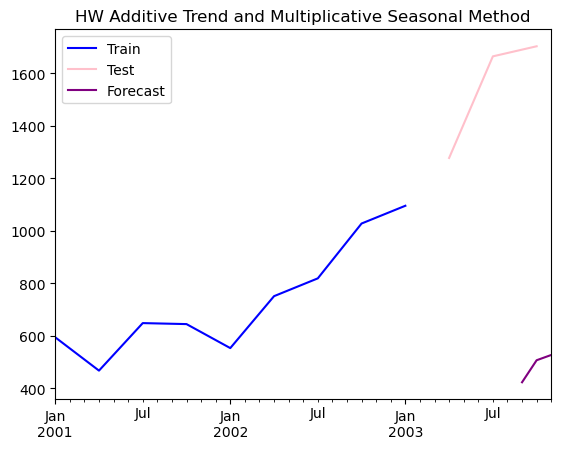

In [21]:

from statsmodels.tsa.api import ExponentialSmoothing
alpha = 0.12
beta = 0.15
gamma = 0.12
hw_mul  = ExponentialSmoothing(y_trn_gdp,seasonal_periods=12,trend='add',seasonal='mul')
fit1 = hw_mul.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color='blue',label = 'Train')
y_test.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
#plt.text(10,400 ,'RMSE ='+ str(error))
plt.title("HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc="best")
#print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

RMSE =  95.35963020341964


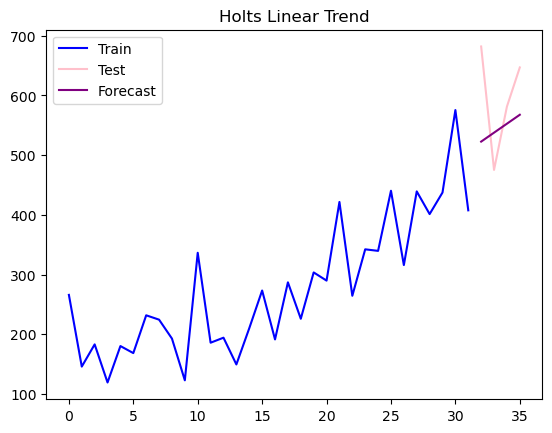

In [100]:
from  statsmodels.tsa.api import Holt
holt = Holt(y_trn_gdp)
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_tst_gdp))
y_trn_gdp.plot(color='blue',label = 'Train')
y_tst_gdp.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
plt.title("Holts Linear Trend")
plt.legend(loc="best")
print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

RMSE =  258.4548345599049


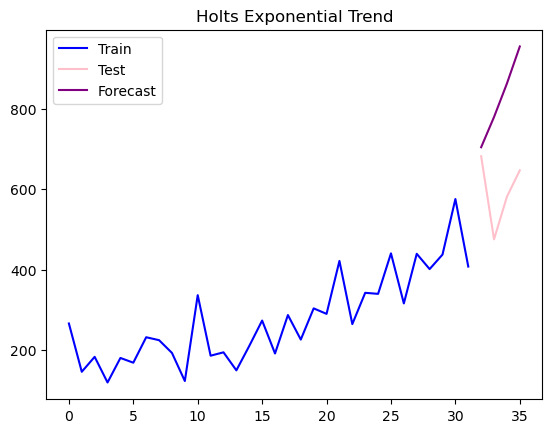

In [89]:
from  statsmodels.tsa.api import Holt
alpha = 0.1
beta = 1.0
holt = Holt(y_trn_gdp,exponential = True)
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_tst_gdp))
y_trn_gdp.plot(color='blue',label = 'Train')
y_tst_gdp.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
plt.title("Holts Exponential Trend")
plt.legend(loc="best")
print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

RMSE =  117.43993827395968


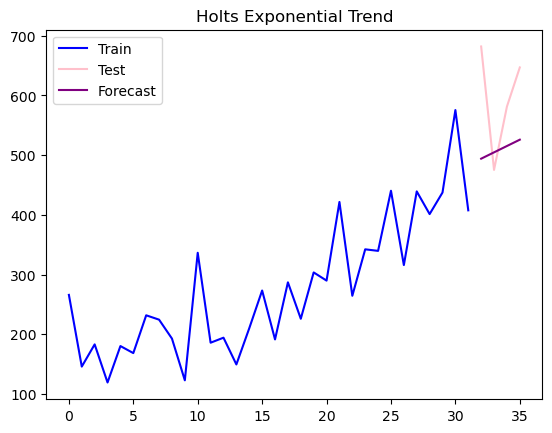

In [90]:
holt = Holt(y_trn_gdp)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_tst_gdp))
y_trn_gdp.plot(color='blue',label = 'Train')
y_tst_gdp.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
plt.title("Holts Exponential Trend")
plt.legend(loc="best")
print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

RMSE =  99.71282039361571


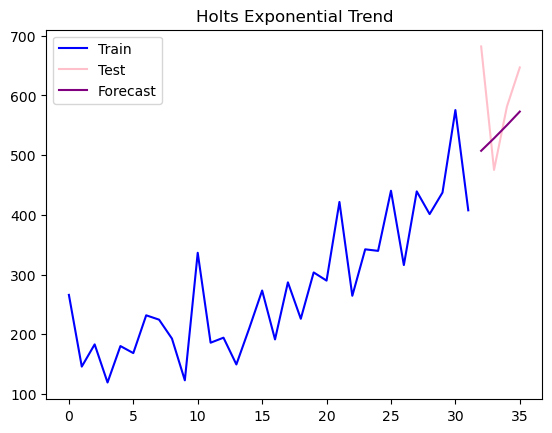

In [91]:
holt = Holt(y_trn_gdp,exponential=True)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_tst_gdp))
y_trn_gdp.plot(color='blue',label = 'Train')
y_tst_gdp.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
plt.title("Holts Exponential Trend")
plt.legend(loc="best")
print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

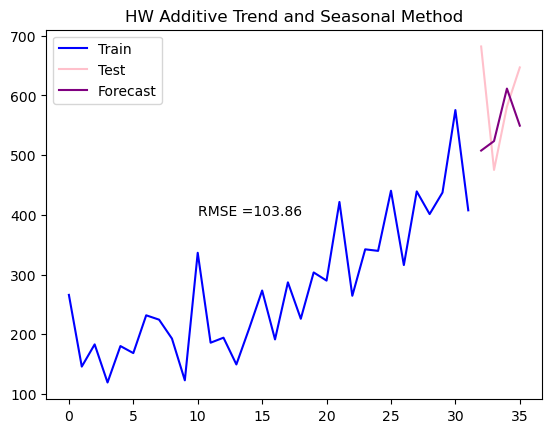

In [115]:

from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.25
beta = 0.25
gamma = 0.01
hw_add  = ExponentialSmoothing(y_trn_gdp,seasonal_periods=12,trend='add',seasonal='add',use_boxcox=0.4)
fit1 = hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_tst_gdp))
y_trn_gdp.plot(color='blue',label = 'Train')
y_tst_gdp.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
error = round(sqrt(mean_squared_error(y_tst_gdp,fcast1)),2)
plt.text(10,400 ,'RMSE ='+ str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc="best")
#print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

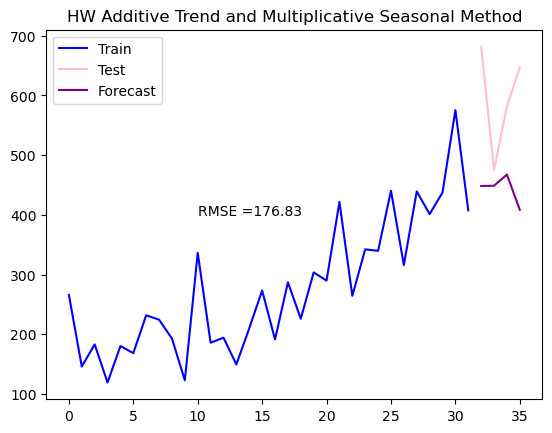

In [114]:
alpha = 0.45
beta = 0.4
gamma = 0.3
hw_mul  = ExponentialSmoothing(y_trn_gdp,seasonal_periods=12,trend='add',seasonal='mul',use_boxcox=0.4)
fit1 = hw_mul.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_tst_gdp))
y_trn_gdp.plot(color='blue',label = 'Train')
y_tst_gdp.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
error = round(sqrt(mean_squared_error(y_tst_gdp,fcast1)),2)
plt.text(10,400 ,'RMSE ='+ str(error))
plt.title("HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc="best")
#print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

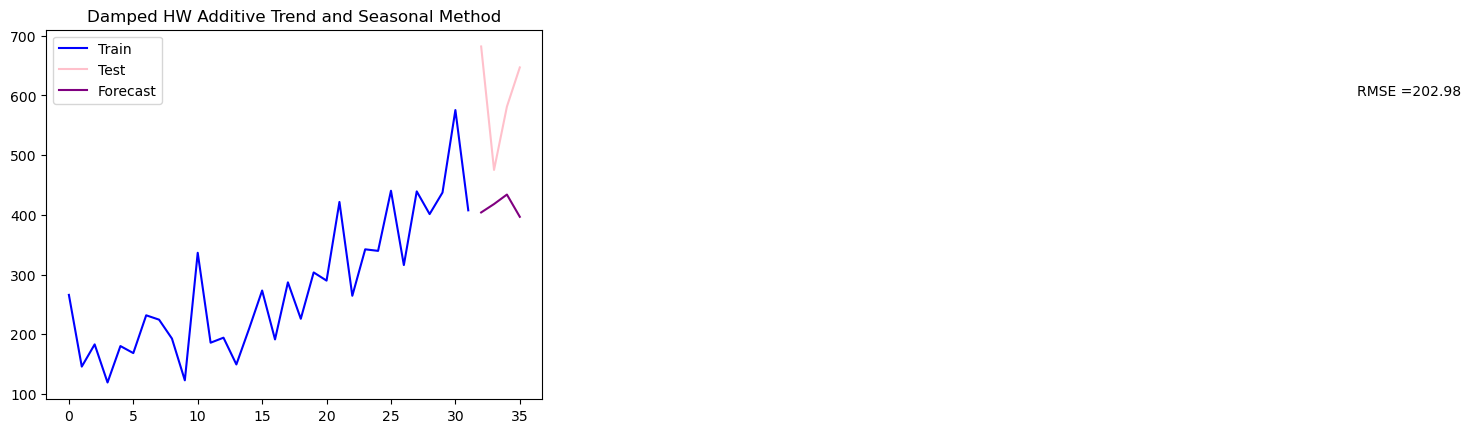

In [111]:
alpha = 0.8
beta = 0.02
gamma = 0.1
phi = 0.1
hw_mul  = ExponentialSmoothing(y_trn_gdp,seasonal_periods=12,trend='add',seasonal='add',damped_trend=True)
fit1 = hw_mul.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fcast1 = fit1.forecast(len(y_tst_gdp))
y_trn_gdp.plot(color='blue',label = 'Train')
y_tst_gdp.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
error = round(sqrt(mean_squared_error(y_tst_gdp,fcast1)),2)
plt.text(100,600 ,'RMSE ='+ str(error))
plt.title("Damped HW Additive Trend and Seasonal Method")
plt.legend(loc="best")
#print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()